In [33]:
%load_ext autoreload

import numpy as np
import torch
from cmr.methods.kmm_neural import KMMNeural
from cmr.utils.torch_utils import np_to_tensor, tensor_to_np
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
np.random.seed(123485)
torch.random.manual_seed(12345)

from experiments.exp_network_iv import NetworkIVExperiment
exp = NetworkIVExperiment(ftype='sin')
exp.prepare_dataset(n_train=1000, n_val=1000, n_test=20000)

estimator = KMMNeural(model=exp.get_model(), moment_function=exp.moment_function, verbose=2, rkhs_reg_param=1e-6,
                     batch_size=None, n_random_features=None)
estimator.train(exp.train_data, exp.val_data)
print(estimator.get_trained_parameters())


Using full batch kernel Gram matrix version ...
epoch 0, theta-obj=-10.117145, val-loss=1.049539
epoch 100, theta-obj=-9.979467, val-loss=1.052724
epoch 200, theta-obj=-9.976732, val-loss=1.041923
epoch 300, theta-obj=-9.975826, val-loss=1.032849
epoch 400, theta-obj=-9.974203, val-loss=1.024241
epoch 500, theta-obj=-9.976806, val-loss=1.015182
epoch 600, theta-obj=-9.976381, val-loss=1.003987
epoch 700, theta-obj=-9.975679, val-loss=0.991434
epoch 800, theta-obj=-9.975086, val-loss=0.982568
epoch 900, theta-obj=-9.974306, val-loss=0.973536
epoch 1000, theta-obj=-9.973496, val-loss=0.971646
epoch 1100, theta-obj=-9.972104, val-loss=0.950614
epoch 1200, theta-obj=-9.971403, val-loss=0.944715
epoch 1300, theta-obj=-9.971265, val-loss=0.942513
epoch 1400, theta-obj=-9.970893, val-loss=0.937371
epoch 1500, theta-obj=-9.970986, val-loss=0.932244
epoch 1600, theta-obj=-9.970516, val-loss=0.929104
epoch 1700, theta-obj=-9.967934, val-loss=0.925054
epoch 1800, theta-obj=-9.970874, val-loss=0.9

In [31]:
x_train, z_train = np_to_tensor([exp.train_data['t'], exp.train_data['y']]), np_to_tensor(exp.train_data['z'])
rkhs_func = estimator.eval_rkhs_func(x_train, z_train)

Shift:  0.9413654


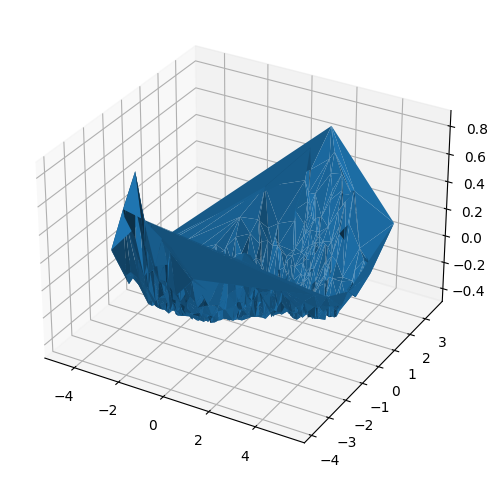

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

rkhs_func_np = np.squeeze(tensor_to_np(rkhs_func))
x_train_np = np.squeeze(tensor_to_np(x_train))
z_train_np = np.squeeze(tensor_to_np(z_train))
shift_np = np.squeeze(estimator.dual_normalization.params.detach().numpy())
print('Shift: ', shift_np)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot_trisurf(x_train_np[0], x_train_np[1], rkhs_func_np + shift_np)